# Bank Marketing #

**Problem Statement **

The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. In this project, we need to build a model for deciding whether a campaign will be successful in getting a client to sign up for the term deposits.

## Importing Libraries ##

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('C:/Users/vivek/Downloads/ban.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [20]:
#shape of the data set
df.shape

(4521, 17)

In [6]:
#null value percentage
round(df.isnull().sum()/len(df)*100,2)

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64

In [7]:
#overview of the data set
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [8]:
#checking for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [10]:
#creating function for changing string to numbers
def number_(x):
    return x.map({'no':0, 'yes': 1})
    
df['y'] = df[['y']].apply(number_)
df['y'].head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [11]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


In [21]:
#importing libraries
import matplotlib.pyplot as plt
import seaborn as sns

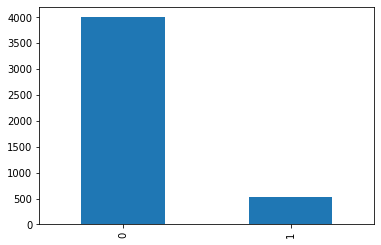

In [22]:
#comparision between yes and no
df['y'].value_counts().plot.bar()
plt.show()

**OMG! most of the people are responeded negative for the campain**

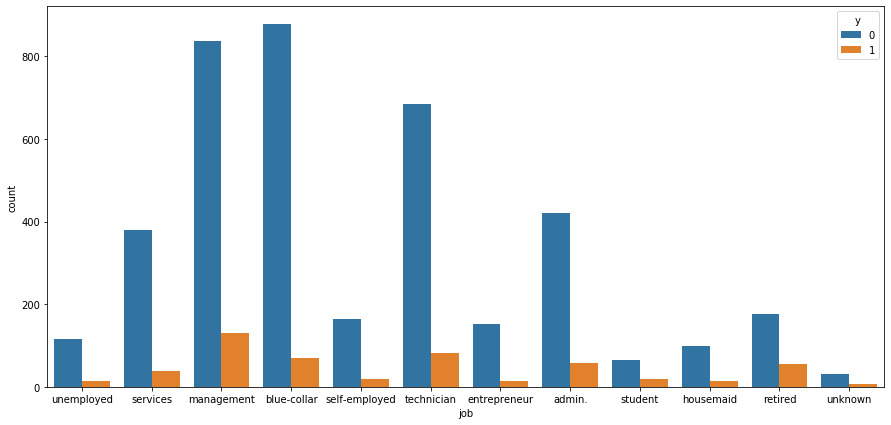

In [23]:
#count plot between job and y
plt.figure(figsize=(15,7))
sns.countplot(df['job'],hue=df['y'])
plt.show()

**From the above graph we can observe that most of the blue-collor job holders are said no for the campain and managment staff are responded positive for the campain**

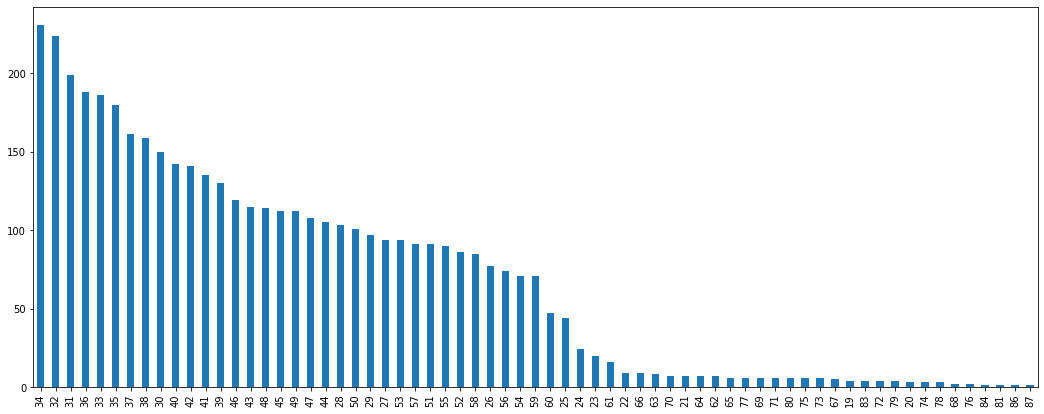

In [24]:
#checking for age group who responded for campagin
plt.figure(figsize=(18,7))
df['age'].value_counts().plot.bar()
plt.show()

**from the above bar graph on our independent variable ‘age’, we can tell that most of the users are within the age 30 - 45. and we have less users from 60 upward**

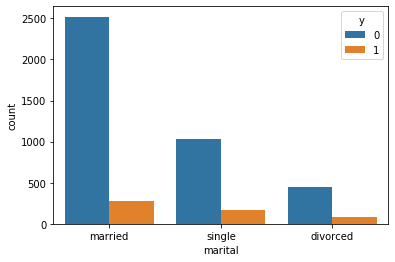

In [25]:
#count plot between marital status
sns.countplot(df["marital"],hue=df["y"])

**most of the married persons are responded negative for the campagin**

## checking for coreleation ##

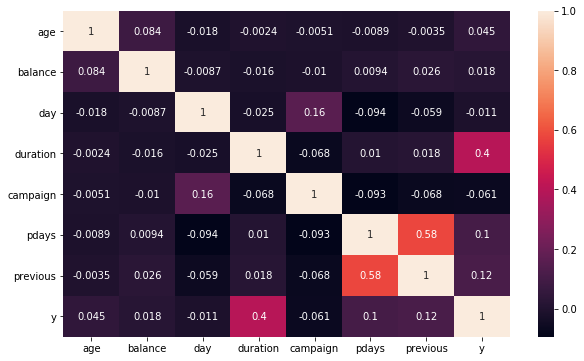

In [26]:
#co-relation
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

# building ML model #

In [27]:
#importing libraries
from sklearn.preprocessing import LabelEncoder,StandardScaler
encoder=LabelEncoder()
scaler=StandardScaler()

In [28]:
encoder.fit_transform(df["job"])

array([10,  7,  4, ...,  9,  1,  2])

In [29]:
#creating dummies 
def dummies_(i):
    keys=df.keys()
    for i in keys:
        if type(df[str(i)][0])==str:
            df[i]=encoder.fit_transform(df[i])
            
            
df.apply(dummies_)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


Now we encode the other categorical variables using pandas get_dummies. ‘df’ specifies the dataset we are about to encode, ‘columns’ specifies the particular set of columns we are about to encode since the dataset also contains numerical data.

In [30]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

From sklearn library we will use Logistic regression to train our model with all parameter as default, and print both train and test accuracy

In [31]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100)

In [32]:
model=LogisticRegression()

In [33]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
y_predict=model.predict(x_test)

In [35]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [36]:
print("accuracy_score of test data",accuracy_score(y_test,y_predict))

accuracy_score of test data 0.9027266028002948


Text(0.5, 1, 'confusion matrix')

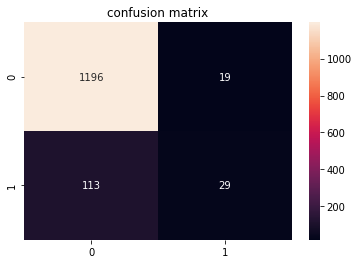

In [37]:
c=confusion_matrix(y_test,y_predict)
sns.heatmap(c,annot=True,fmt='d')
plt.title("confusion matrix")

Logistic Regression gave us 90% accuracy both on train and test data. Confusion matrix tells us that our model correctly 